### In the first model, data is simulated then split into test and train sets. the learning rate, number of iterations and patience is set. The patience variable will tell us how after how many iterations of no improvements of the MSE we will stop the model. The predict function is the dot product of the weights and x variable. Gradient descent is done to improve accuracy of the model. Gradient descent allows us to get the weights and biases that will be used to make predictions. Learning rate scheduling is used as it reduces over-fitting of the model. The learning rate decreases after so many iterations to decrease the step size during gradient descent. Below the code, the MSE's are printed and data points are plotted with the red line representing the output function from the model. Each of the following perceptron models will follow similar steps with small variations.


### Gradient Descent

Iteration: 0
MSE: 0.13842605945237982
Best MSE: 0.13842605945237982
Iteration: 50
MSE: 0.09997077561292905
Best MSE: 0.09997077561292905
Iteration: 100
MSE: 0.09991435458303752
Best MSE: 0.09991435458303752
Iteration: 150
MSE: 0.09991420987259586
Best MSE: 0.09991420987259586
Iteration: 200
MSE: 0.09991420917279292
Best MSE: 0.09991420917279292
Iteration: 250
MSE: 0.09991420916688472
Best MSE: 0.09991420916688472
Iteration: 300
MSE: 0.09991420916680287
Best MSE: 0.09991420916680287
Iteration: 350
MSE: 0.09991420916680109
Best MSE: 0.09991420916680109
Early stopping at iteration 371
Best MSE: 0.09991420916680106


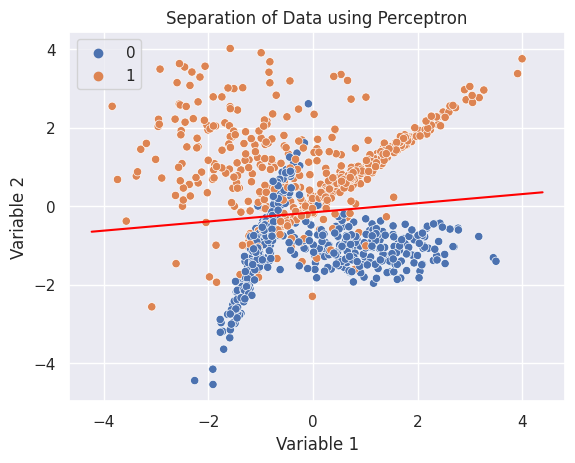

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

np.random.seed(0)
weights = np.random.rand(X.shape[1])
biases = np.zeros(1)

learning_rate = 0.1
n_iterations = 500
patience = 10
best_weights = None
best_biases = None
best_mse = float('inf')
no_improvement = 0

#Sigmoid Activation Function
def activation_fn(x):
    return 1 / (1 + np.exp(-x))

#Dot product of X with weights plus biases: y=<w,x>
def predict(X, weights, biases):
    weighted_sum = np.dot(X, weights) + biases
    return activation_fn(weighted_sum)

#Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#Gradient Descent
def gradient_descent(X, y_true, y_pred, weights, biases):
    error = y_true - y_pred
    delta = error * y_pred * (1 - y_pred)
    weights += learning_rate * np.dot(X.T, delta)
    biases += learning_rate * np.sum(delta)
    return weights, biases

#Iterate and fit model by updating weights and biases, then predict
for i in range(n_iterations):
    y_pred = predict(X_train, weights, biases)
    error = mean_squared_error(y_train, y_pred)
    weights, biases = gradient_descent(X_train, y_train, y_pred, weights, biases)



    #Output from <w,x>
    y_pred_test = predict(X_test, weights, biases)
    mse = mean_squared_error(y_test, y_pred_test)

    if mse < best_mse:
        best_mse = mse
        best_weights = weights.copy()
        best_biases = biases.copy()
        no_improvement = 0
    else:
        no_improvement += 1

    if no_improvement >= patience:
        print("Early stopping at iteration", i)
        break

    #Learning Rate Scheduling
    if i % 50 == 0:
        print("Iteration:", i)
        print("MSE:", mse)
        learning_rate *= 0.9
        print("Best MSE:", best_mse)

print("Best MSE:", mse)
sns.set(style="darkgrid")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-best_biases - best_weights[0] * x_vals) / best_weights[1]
sns.lineplot(x=x_vals, y=y_vals, color='red')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Separation of Data using Perceptron')
plt.show()

### The following model stochastic gradient descent is used instead of gradient descent. In the stochastic model a random index is selected and the weights and bias are calculated. As opposed to regular gradient descent where all the training samples are used to calculate the gradient, only one sample is used at a time in stochastic gradient descent. Here we see a slight decrease in performance with the MSE decreasing from .099 in the gradient descent model to .11, with a higher score meaning less accuracy for the model.


### Stochastic Gradient Descent

Iteration: 0
MSE: 0.16151164303521198
Best MSE: 0.16151164303521198
Early stopping at iteration 36
Best MSE: 0.14271324601446328


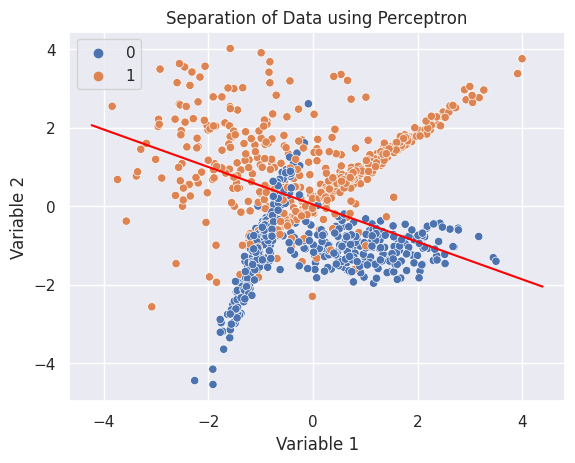

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

np.random.seed(0)
weights = np.random.rand(X.shape[1])
biases = np.zeros(1)

learning_rate = 0.1
n_iterations = 500
patience = 10
best_weights = None
best_biases = None
best_mse = float('inf')
no_improvement = 0


def activation_fn(x):
    return 1 / (1 + np.exp(-x))

#Dot product of X with weights plus biases: y=<w,x>
def predict(X, weights, biases):
    weighted_sum = np.dot(X, weights) + biases
    return activation_fn(weighted_sum)

#Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#stochastic Gradient Descent
def stochastic_gradient_descent(X, y_true, y_pred, weights, biases):
    random_index = random.randint(0, len(X) - 1) # randomly select an index
    X_random = X[random_index]
    y_true_random = y_true[random_index]
    y_pred_random = y_pred[random_index]
    error = y_true_random - y_pred_random
    delta = error * y_pred_random * (1 - y_pred_random)
    weights += learning_rate * np.dot(X_random.T, delta)
    biases += learning_rate * np.sum(delta)
    return weights, biases

#Iterate and fit model by updating weights and biases, then predict
for i in range(n_iterations):
    y_pred = predict(X_train, weights, biases)
    error = mean_squared_error(y_train, y_pred)
    weights, biases = stochastic_gradient_descent(X_train, y_train, y_pred, weights, biases)


    # Output from <w,x>
    y_pred_test = predict(X_test, weights, biases)
    mse = mean_squared_error(y_test, y_pred_test)

    if mse < best_mse:
        best_mse = mse
        best_weights = weights.copy()
        best_biases = biases.copy()
        no_improvement = 0
    else:
        no_improvement += 1

    if no_improvement >= patience:
        print("Early stopping at iteration", i)
        break

    # Learning Rate Scheduling
    if i % 50 == 0:
        print("Iteration:", i)
        print("MSE:", mse)
        learning_rate *= 0.9
        print("Best MSE:", best_mse)
print("Best MSE:", mse)
sns.set(style="darkgrid")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-best_biases - best_weights[0] * x_vals) / best_weights[1]
sns.lineplot(x=x_vals, y=y_vals, color='red')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Separation of Data using Perceptron')
plt.show()

### In the following model, mini batch gradient descent is used with a sigmoid activation function. Mini batch gradient descent randomly selects multiple training samples known as batches to train on, instead of one element at a time as is the case with stochastic gradient descent. We see a slight improvement in performance with MSE decreasing from .11 in the stochastic gradient case to .10 in the mini batch case as seen below.


### Mini Batch Gradient Descent With Sigmoid Activation Function

Iteration: 0
MSE: 0.16947978923810775
Iteration: 50
MSE: 0.10455016705111045
Early stopping at iteration 52
Best MSE: 0.10090324188847218
Best MSE: 0.10090324188847218


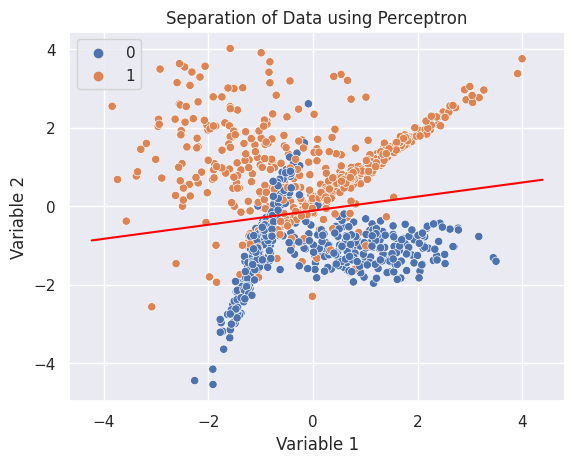

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

np.random.seed(0)
weights = np.random.rand(X.shape[1])
biases = np.zeros(1)

learning_rate = 0.1
n_iterations = 500
patience = 10
batch_size = 10
best_weights = None
best_biases = None
best_mse = float('inf')
no_improvement = 0

def activation_fn(x):
    return 1 / (1 + np.exp(-x))

def predict(X, weights, biases):
    weighted_sum = np.dot(X, weights) + biases
    return activation_fn(weighted_sum)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def backpropagation(X, y_true, y_pred, weights, biases):
    error = y_true - y_pred
    delta = error * y_pred * (1 - y_pred)
    weights += learning_rate * np.dot(X.T, delta)
    biases += learning_rate * np.sum(delta)
    return weights, biases




for i in range(n_iterations):
      #randomly select batch
    random_indices = np.random.choice(len(X_train), batch_size, replace=False)
    X_batch = X_train[random_indices]
    y_batch = y_train[random_indices]


    y_pred = predict(X_batch, weights, biases)
    weights, biases = backpropagation(X_batch, y_batch, y_pred, weights, biases)


    y_pred = predict(X_train, weights, biases)
    mse = mean_squared_error(y_train, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_weights = weights.copy()
        best_biases = biases.copy()
        no_improvement = 0
    else:
        no_improvement += 1

    if no_improvement >= patience:
        print("Early stopping at iteration", i)
        break

    if i % 50 == 0:
        print("Iteration:", i)
        print("MSE:", mse)
        learning_rate *= 0.9

y_pred = predict(X_test, best_weights, best_biases)
mse = mean_squared_error(y_test, y_pred)
print("Best MSE:", mse)


print("Best MSE:", mse)
sns.set(style="darkgrid")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-best_biases - best_weights[0] * x_vals) / best_weights[1]
sns.lineplot(x=x_vals, y=y_vals, color='red')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Separation of Data using Perceptron')
plt.show()

### A change in the activation function was made to determine if accuracy can be improved by using Relu instead of sigmoid, however accuracy decreased drastically with the MSE increasing from .11 in the mini batch model to .45 as seen below.

### Mini Batch Gradient Descent With Relu Activation Function

Iteration: 0
MSE: 0.4914276937043424
Early stopping at iteration 11
Best MSE: 0.45190828930976595
Best MSE: 0.45190828930976595


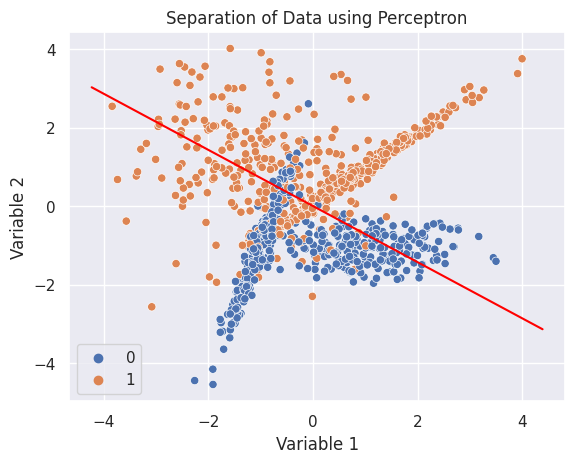

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

np.random.seed(0)
weights = np.random.rand(X.shape[1])
biases = np.zeros(1)

learning_rate = 0.1
n_iterations = 500
patience = 10
batch_size = 10
best_weights = None
best_biases = None
best_mse = float('inf')
no_improvement = 0


def activation_fn(x):
    return np.maximum(0, x)

def predict(X, weights, biases):
    weighted_sum = np.dot(X, weights) + biases
    return activation_fn(weighted_sum)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def backpropagation(X, y_true, y_pred, weights, biases):
    error = y_true - y_pred
    delta = error * y_pred * (1 - y_pred)

    weights += learning_rate * np.dot(X.T, delta)
    biases += learning_rate * np.sum(delta)
    return weights, biases

for i in range(n_iterations):

    random_indices = np.random.choice(len(X_train), batch_size, replace=False)
    X_batch = X_train[random_indices]
    y_batch = y_train[random_indices]


    y_pred = predict(X_batch, weights, biases)
    weights, biases = backpropagation(X_batch, y_batch, y_pred, weights, biases)

    y_pred = predict(X_train, weights, biases)
    mse = mean_squared_error(y_train, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_weights = weights.copy()
        best_biases = biases.copy()
        no_improvement = 0
    else:
        no_improvement += 1

    if no_improvement >= patience:
        print("Early stopping at iteration", i)
        break

    if i % 50 == 0:
        print("Iteration:", i)
        print("MSE:", mse)
        learning_rate *= 0.9

y_pred = predict(X_test, best_weights, best_biases)
mse = mean_squared_error(y_test, y_pred)
print("Best MSE:", mse)


print("Best MSE:", mse)
sns.set(style="darkgrid")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-best_biases - best_weights[0] * x_vals) / best_weights[1]
sns.lineplot(x=x_vals, y=y_vals, color='red')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Separation of Data using Perceptron')
plt.show()

### Different initialization techniques were tried below to see if there would be a change in performance of the model. Below we have mini batch gradient descent with He initialization. He initialization was created to deeal with the vanishing gradient problem. The main idea behind He initialization is to initialize the weights of the network so that the variance of the outputs of each layer remains the same as the inputs. This helps in preventing the gradients from becoming too small or too large, which can hinder the convergence of the network. This model performed slightly better than the previous model with mini batch and Relu activation function with MSE at .32 compared to .4 for the previous model.

### Mini Batch Stochastic Gradient Descent With He Initialization

Iteration: 0
MSE: 1.5466222464561712
Early stopping at iteration 17
Best MSE: 0.32451174137838834


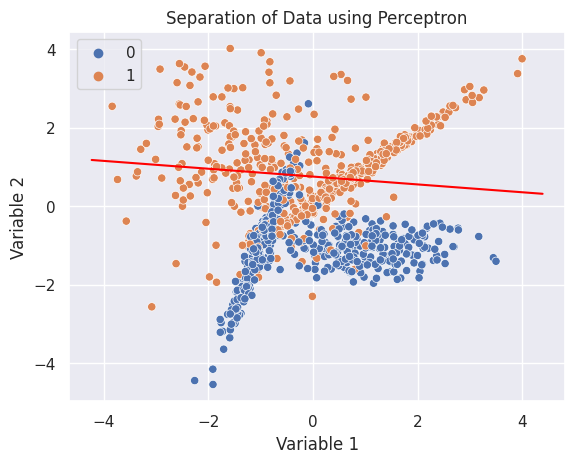

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

#He initiliaization instead of initialization of an empty matrix as before
def he_initialization(n_features):
    return np.random.randn(n_features) * np.sqrt(2/n_features)
np.random.seed(0)
weights = he_initialization(X.shape[1])
biases = np.zeros(1)

learning_rate = 0.1
n_iterations = 500
patience = 10
batch_size = 10
best_weights = None
best_biases = None
best_mse = float('inf')
no_improvement = 0

def activation_fn(x):
    return 1 / (1 + np.exp(-x))

def activation_fn(x):
    return np.maximum(0, x)
def predict(X, weights, biases):
    weighted_sum = np.dot(X, weights) + biases
    return activation_fn(weighted_sum)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def backpropagation(X, y_true, y_pred, weights, biases):
    error = y_true - y_pred
    delta = error * (y_pred > 0)
    weights += learning_rate * np.dot(X.T, delta)
    biases += learning_rate * np.sum(delta)
    return weights, biases

for i in range(n_iterations):
    random_indices = np.random.choice(len(X_train), batch_size, replace=False)
    X_batch = X_train[random_indices]
    y_batch = y_train[random_indices]


    y_pred = predict(X_batch, weights, biases)
    weights, biases = backpropagation(X_batch, y_batch, y_pred, weights, biases)

    y_pred = predict(X_train, weights, biases)
    mse = mean_squared_error(y_train, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_weights = weights.copy()
        best_biases = biases.copy()
        no_improvement = 0
    else:
        no_improvement += 1

    if no_improvement >= patience:
        print("Early stopping at iteration", i)
        break

    if i % 50 == 0:
        print("Iteration:", i)
        print("MSE:", mse)
        learning_rate *= 0.9
y_pred = predict(X_test, best_weights, best_biases)
mse = mean_squared_error(y_test, y_pred)
print("Best MSE:", mse)

sns.set(style="darkgrid")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-best_biases - best_weights[0] * x_vals) / best_weights[1]
sns.lineplot(x=x_vals, y=y_vals, color='red')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Separation of Data using Perceptron')
plt.show()

### Next Mini batch gradient descent with Xavier inititialization was done. The Xavier initialization technique sets the initial weights of a neural network layer based on the size of its input and output connections. The idea behind this initialization is to ensure that the variance of the activations and gradients remains consistent across all layers during training. By doing this, Xavier initialization helps to prevent the issues of vanishing/exploding gradient. This model performed better than the He initialization with an MSE of .09.

### Mini Batch Stochastic Gradient Descent with Xavier Initilization

Iteration: 0
MSE: 0.3032177740255828
Iteration: 50
MSE: 0.1063911074131227
Iteration: 100
MSE: 0.10134958630156317
Iteration: 150
MSE: 0.09964624856517697
Iteration: 200
MSE: 0.09897320555712372
Iteration: 250
MSE: 0.09859853368670138
Early stopping at iteration 254
Best MSE: 0.09939765259934065


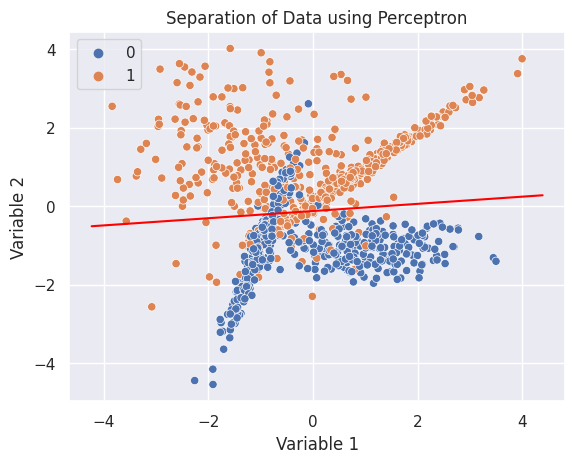

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def xavier_initialization(n_features):
    return np.random.randn(n_features) * np.sqrt(1/n_features)

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

np.random.seed(0)
weights = xavier_initialization(X.shape[1])
biases = np.zeros(1)

learning_rate = 0.1
n_iterations = 500
patience = 10
batch_size = 10
best_weights = None
best_biases = None
best_mse = float('inf')
no_improvement = 0

def activation_fn(x):
    return 1 / (1 + np.exp(-x))

def predict(X, weights, biases):
    weighted_sum = np.dot(X, weights) + biases
    return activation_fn(weighted_sum)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def backpropagation(X, y_true, y_pred, weights, biases):
    error = y_true - y_pred
    delta = error * y_pred * (1 - y_pred)
    weights += learning_rate * np.dot(X.T, delta)
    biases += learning_rate * np.sum(delta)
    return weights, biases

for i in range(n_iterations):

    random_indices = np.random.choice(len(X_train), batch_size, replace=False)
    X_batch = X_train[random_indices]
    y_batch = y_train[random_indices]

    y_pred = predict(X_batch, weights, biases)
    weights, biases = backpropagation(X_batch, y_batch, y_pred, weights, biases)

    y_pred = predict(X_train, weights, biases)
    mse = mean_squared_error(y_train, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_weights = weights.copy()
        best_biases = biases.copy()
        no_improvement = 0
    else:
        no_improvement += 1

    if no_improvement >= patience:
        print("Early stopping at iteration", i)
        break

    if i % 50 == 0:
        print("Iteration:", i)
        print("MSE:", mse)
        learning_rate *= 0.9
y_pred = predict(X_test, best_weights, best_biases)
mse = mean_squared_error(y_test, y_pred)
print("Best MSE:", mse)



sns.set(style="darkgrid")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-best_biases - best_weights[0] * x_vals) / best_weights[1]
sns.lineplot(x=x_vals, y=y_vals, color='red')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Separation of Data using Perceptron')
plt.show()